#Stock Market Analysis Using GRU

#Analysis

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our dataset. At last, we will find the trend and seasonality in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
Meta = pd.read_csv('/content/META.csv', index_col='Date', parse_dates=['Date'])
Meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151600,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


In [3]:
Meta.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3.053000e+03
mean,170.839902,173.059315,168.711150,170.946053,170.614478,2.999018e+07
std,109.244843,110.643906,107.950337,109.368055,109.199958,2.605377e+07
min,18.080000,18.270000,17.549999,17.730000,17.693642,2.830219e+06
25%,82.769997,83.500000,82.150002,82.750000,82.580299,1.592590e+07
50%,161.479996,164.000000,159.279999,161.360001,161.029099,2.220520e+07
75%,219.309998,221.149994,216.110001,218.860001,218.411179,3.454010e+07
max,542.349976,542.809998,531.020020,539.909973,539.909973,5.735764e+08


After describing the Meta dataset, there is a high difference between the minimum and maximum values. And 75% of the value is close to the mean.

In [4]:
Meta.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
Meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3053 entries, 2012-05-18 to 2024-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3053 non-null   float64
 1   High       3053 non-null   float64
 2   Low        3053 non-null   float64
 3   Close      3053 non-null   float64
 4   Adj Close  3053 non-null   float64
 5   Volume     3053 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 167.0 KB


In [6]:
Meta.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
fig = px.histogram(Meta,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(Meta,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.scatter(Meta,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

There is a very high correlation between "Open" and "Close". As we can see from the scatter plot.

In [10]:
Meta.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999786,0.999771,0.999530,0.999529,-0.379719
High,0.999786,1.000000,0.999732,0.999787,0.999786,-0.375977
Low,0.999771,0.999732,1.000000,0.999792,0.999791,-0.383882
Close,0.999530,0.999787,0.999792,1.000000,1.000000,-0.380149
Adj Close,0.999529,0.999786,0.999791,1.000000,1.000000,-0.380060
Volume,-0.379719,-0.375977,-0.383882,-0.380149,-0.380060,1.000000


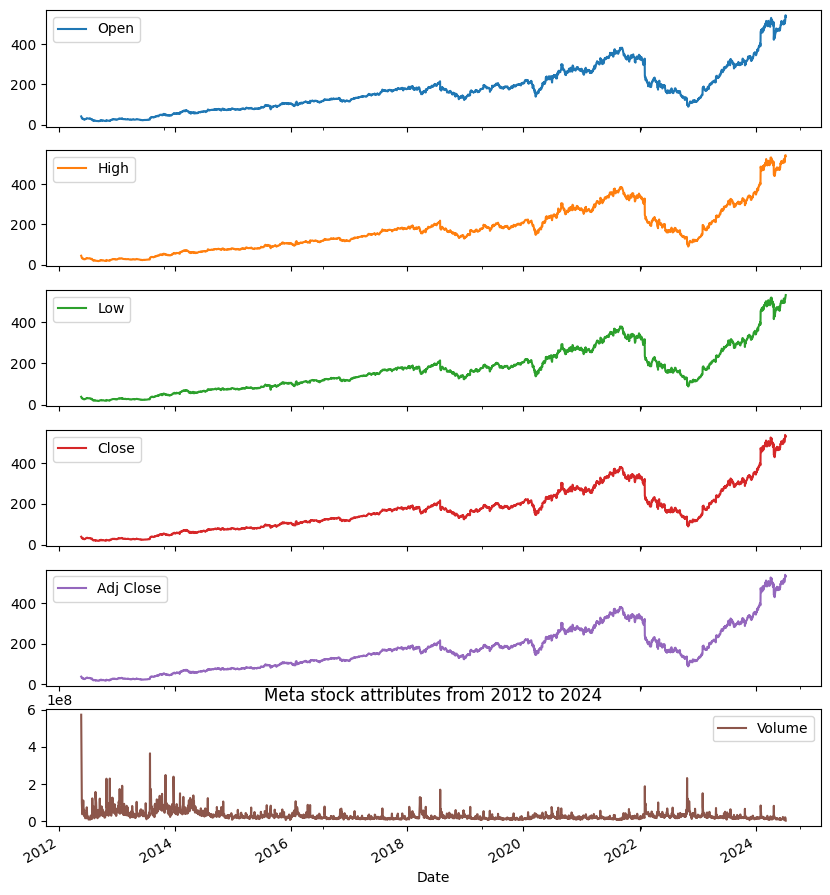

In [11]:
Meta['2012':'2024'].plot(subplots=True, figsize=(10,12))
plt.title('Meta stock attributes from 2012 to 2024')
plt.show()

###High plot

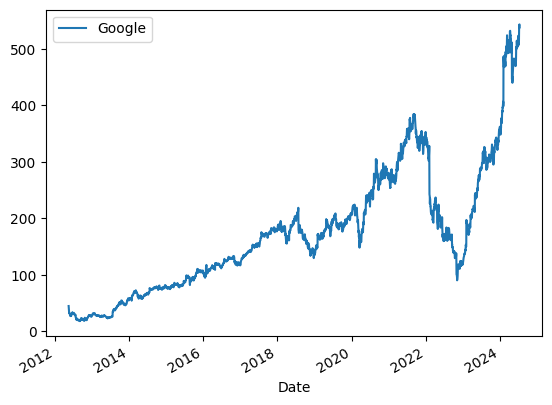

In [12]:
# Plotting before normalization
Meta.High.plot()
plt.legend(['Google'])
plt.show()

In [13]:
# Normalizing and comparison
# Both stocks start from 100
'''normalized_Meta = google.High.div(Meta.High.iloc[0]).mul(100)
plt.legend(['Google'])
plt.show()'''

"normalized_Meta = google.High.div(Meta.High.iloc[0]).mul(100)\nplt.legend(['Google'])\nplt.show()"

In Microsoft data, we can see in 2009 "High" value was under mean for a long time, so we can say there was some loss.

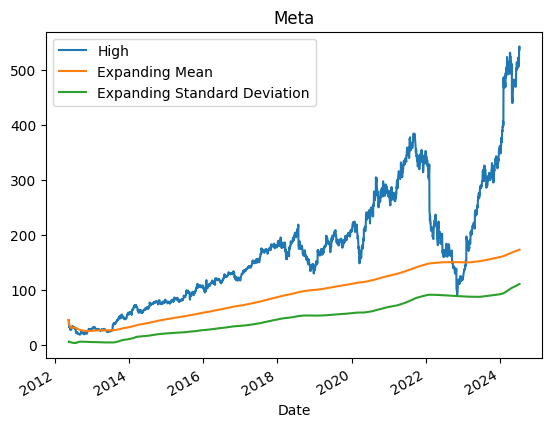

In [14]:
# Expanding window functions
Meta_mean = Meta.High.expanding().mean()
Meta_std = Meta.High.expanding().std()
Meta.High.plot()
Meta_mean.plot()
Meta_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Meta')
plt.show()

###Close

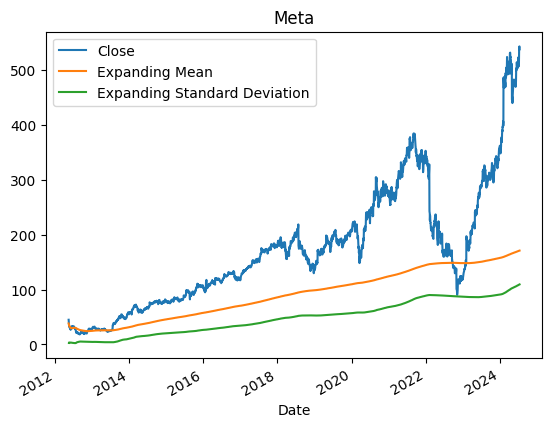

In [15]:
# Expanding window functions
Meta_mean = Meta.Close.expanding().mean()
Meta_std = Meta.Close.expanding().std()
Meta.High.plot()
Meta_mean.plot()
Meta_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Meta')
plt.show()

In [16]:
from pylab import rcParams
import statsmodels.api as sm

##Trend and Seasonality

Meta data

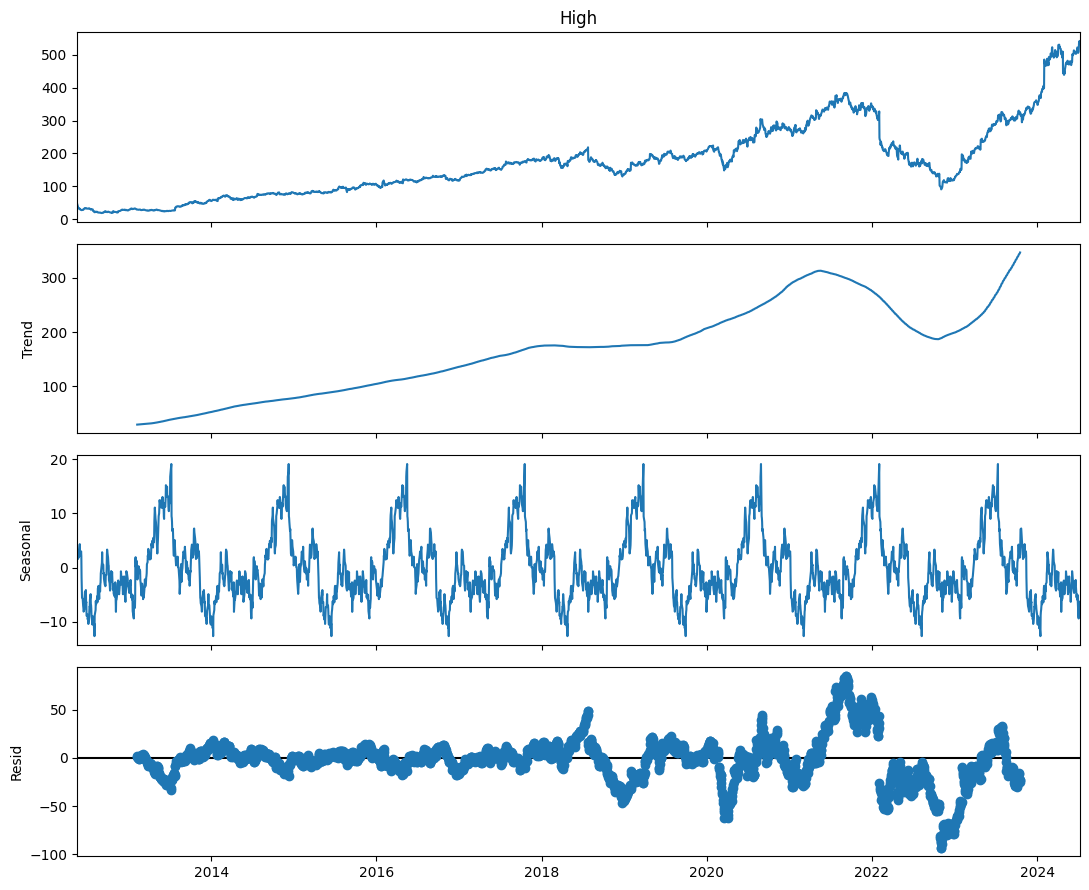

In [17]:
# Now, for decomposition...

rcParams['figure.figsize'] = 11, 9
decomposed_Meta_volume = sm.tsa.seasonal_decompose(Meta["High"],period=360) # The frequncy is annual
figure = decomposed_Meta_volume.plot()
plt.show()

###Close

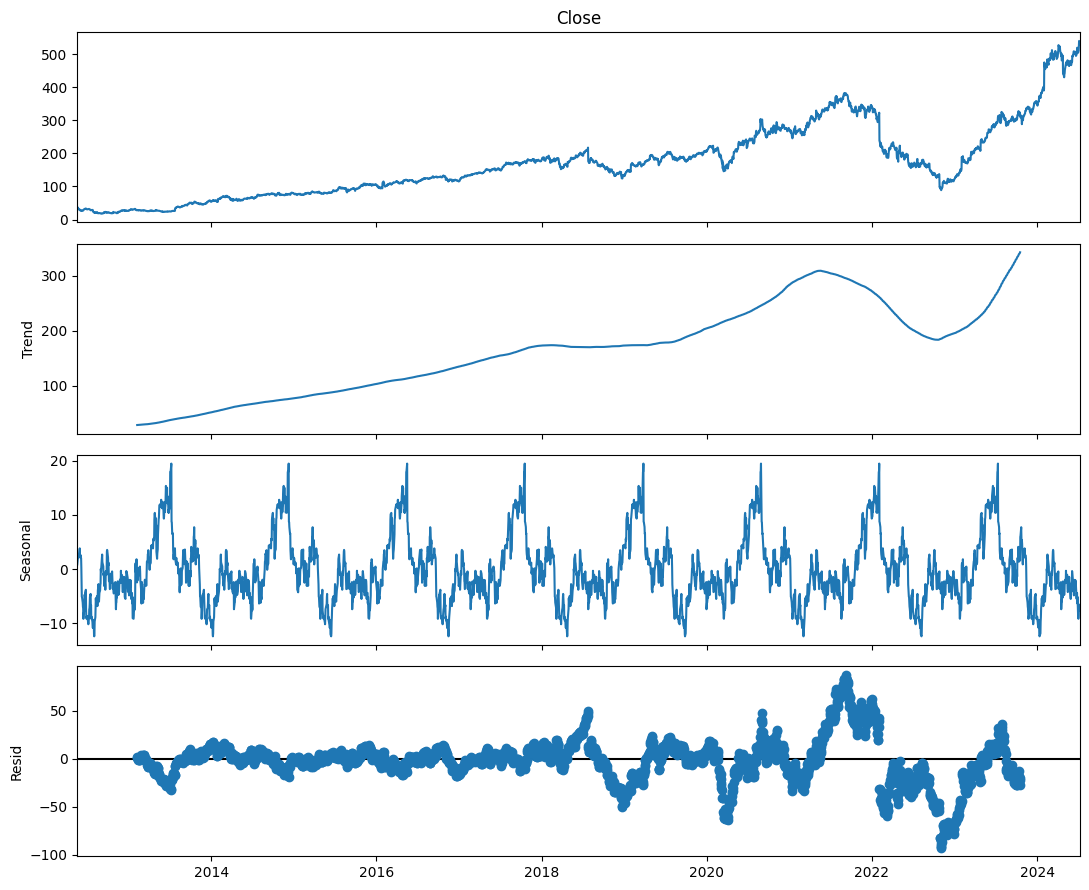

In [18]:
rcParams['figure.figsize'] = 11, 9
decomposed_Meta_volume = sm.tsa.seasonal_decompose(Meta["Close"],period=360) # The frequncy is annual
figure = decomposed_Meta_volume.plot()
plt.show()

#Prediction

##Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


By using GRU time series forecasting we will forcaste and check.

In [19]:

filepath = '/content/META.csv'
data_Meta = pd.read_csv(filepath)
data_Meta = data_Meta.sort_values('Date')
data_Meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151600,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


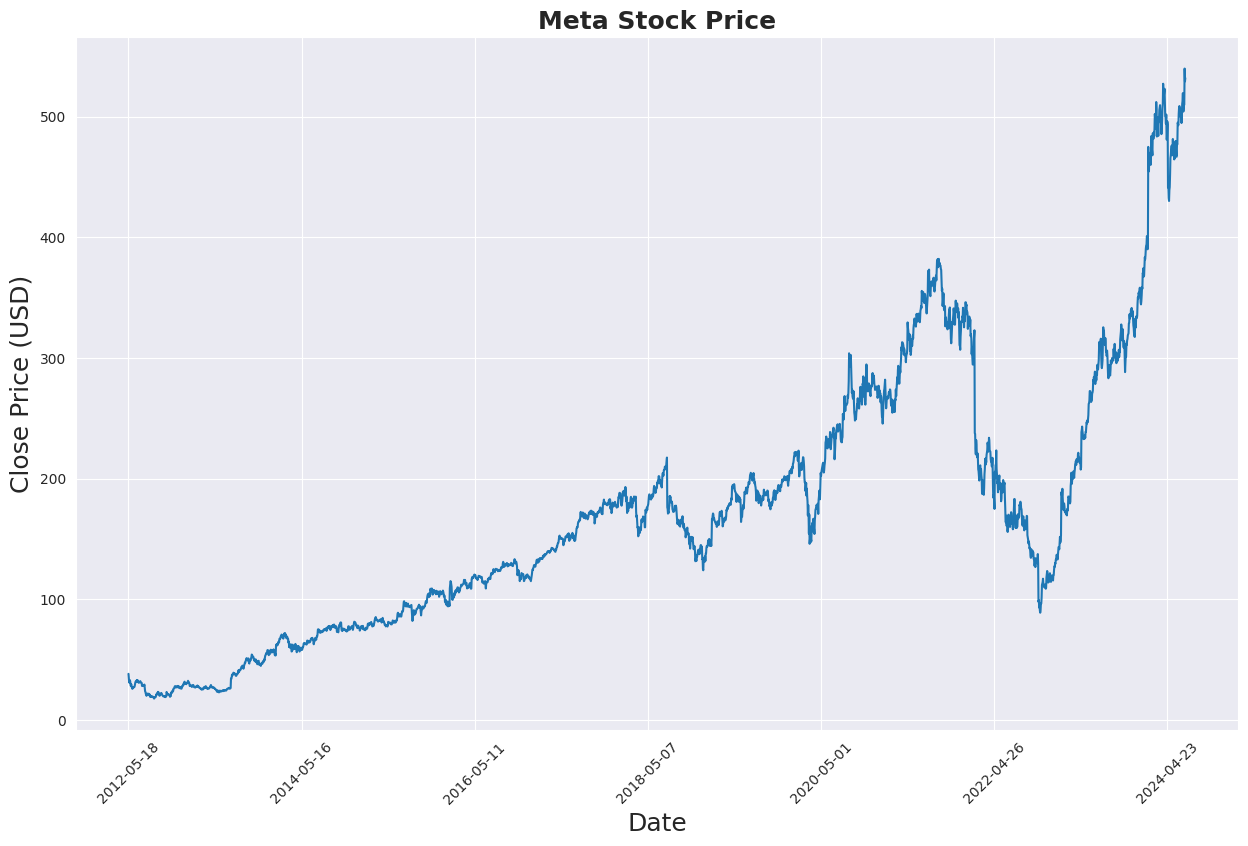

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_Meta[['Close']])
plt.xticks(range(0,data_Meta.shape[0],500),data_Meta['Date'].loc[::500],rotation=45)
plt.title("Meta Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [21]:
price_Meta = data_Meta[['Close']]
price_Meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3053 non-null   float64
dtypes: float64(1)
memory usage: 24.0 KB


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta['Close'].values.reshape(-1,1))

<ipython-input-22-fae4570b63b3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [24]:

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_Meta, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2426, 19, 1)
y_train.shape =  (2426, 1)
x_test.shape =  (607, 19, 1)
y_test.shape =  (607, 1)


In [25]:

import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [26]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [27]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [28]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
import time

In [30]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.32767683267593384
Epoch  1 MSE:  0.14940455555915833
Epoch  2 MSE:  0.07945151627063751
Epoch  3 MSE:  0.12231100350618362
Epoch  4 MSE:  0.0760030671954155
Epoch  5 MSE:  0.045580748468637466
Epoch  6 MSE:  0.05003904923796654
Epoch  7 MSE:  0.04911164566874504
Epoch  8 MSE:  0.025318210944533348
Epoch  9 MSE:  0.002277771942317486
Epoch  10 MSE:  0.020673323422670364
Epoch  11 MSE:  0.02329900860786438
Epoch  12 MSE:  0.00475597009062767
Epoch  13 MSE:  0.007694190833717585
Epoch  14 MSE:  0.014972935430705547
Epoch  15 MSE:  0.011562248691916466
Epoch  16 MSE:  0.004006291273981333
Epoch  17 MSE:  0.0014706440269947052
Epoch  18 MSE:  0.005494445096701384
Epoch  19 MSE:  0.009442380629479885
Epoch  20 MSE:  0.008080030791461468
Epoch  21 MSE:  0.004065217915922403
Epoch  22 MSE:  0.0020932250190526247
Epoch  23 MSE:  0.00296226073987782
Epoch  24 MSE:  0.004303161520510912
Epoch  25 MSE:  0.003987621515989304
Epoch  26 MSE:  0.0021675906609743834
Epoch  27 MSE:  0.0

In [31]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

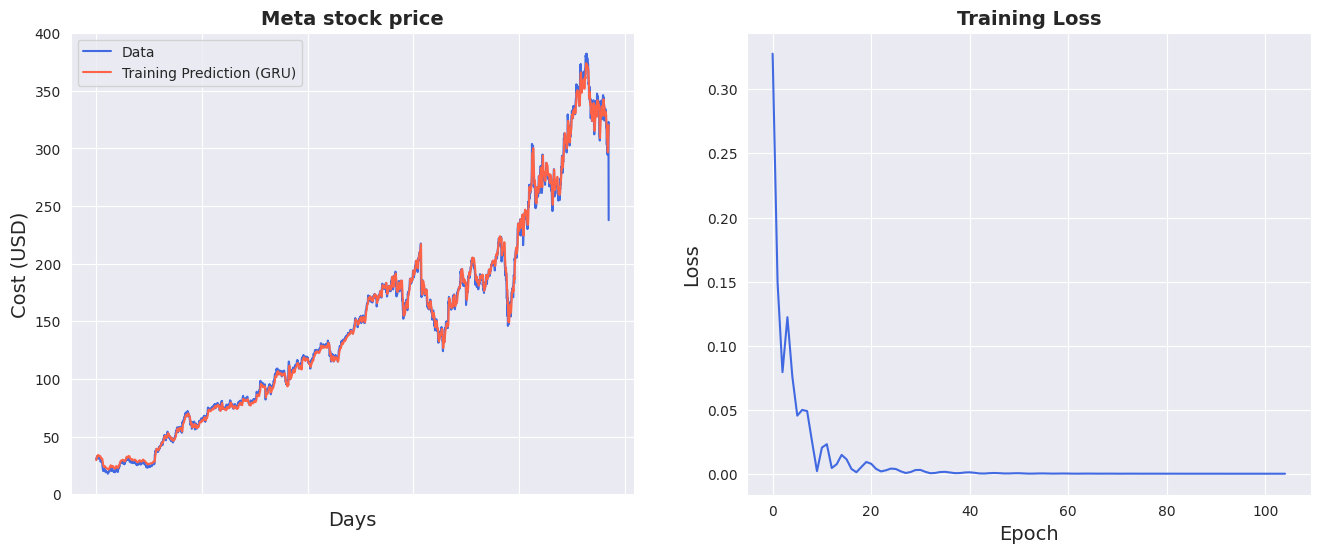

In [32]:
import seaborn as sns
sns.set_style("darkgrid")

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Meta stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [33]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 4.49 RMSE
Test Score: 16.64 RMSE


In [34]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_Meta)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_Meta)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_Meta)-1, :] = y_test_pred

original = scaler.inverse_transform(price_Meta['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [35]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Meta Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

# Auto Regressor


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.151600  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  33.960213  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  30.936428  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  31.934378   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999  32.962265   50237200


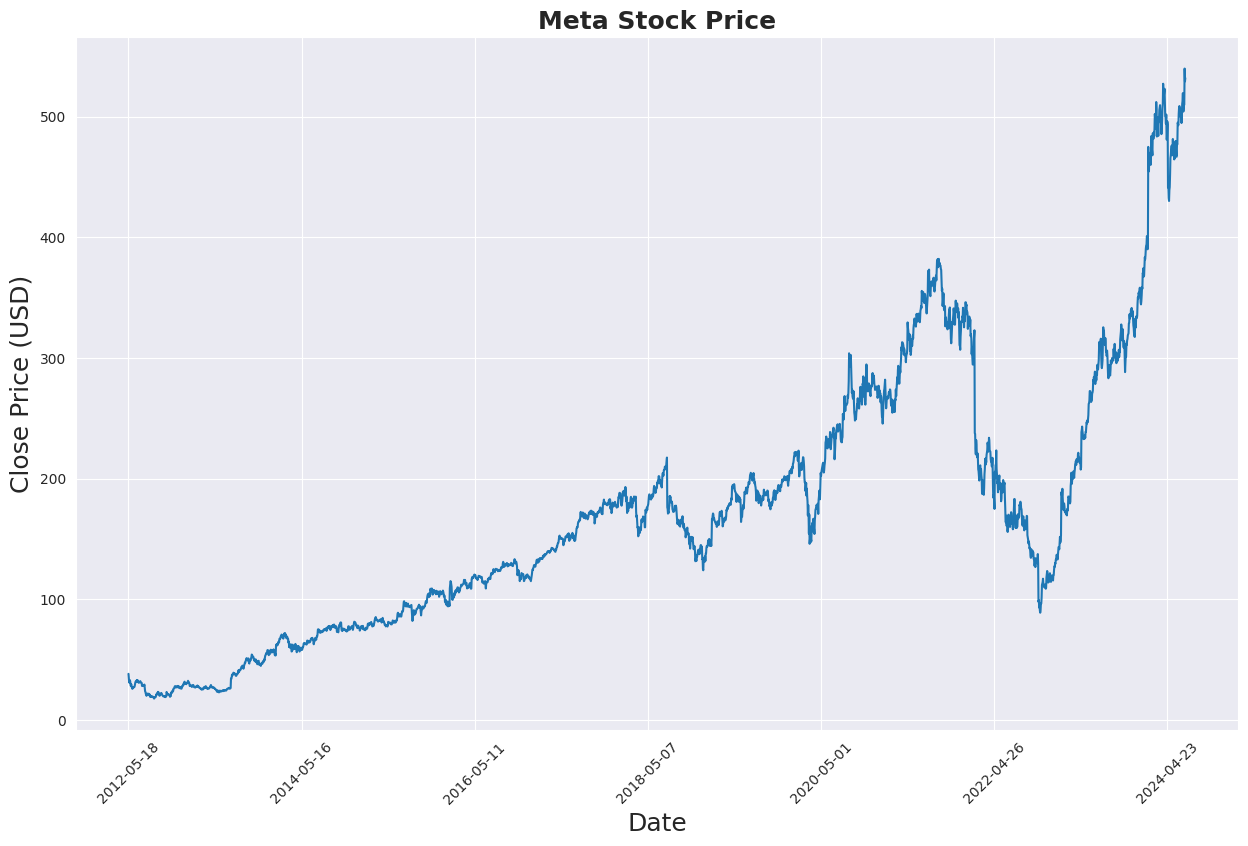

<class 'pandas.core.frame.DataFrame'>
Index: 3053 entries, 2012-05-18 to 2024-07-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3053 non-null   float64
dtypes: float64(1)
memory usage: 47.7+ KB
x_train.shape =  (2426, 19, 1)
y_train.shape =  (2426, 1)
x_test.shape =  (607, 19, 1)
y_test.shape =  (607, 1)


<ipython-input-48-28af17919b81>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Test RMSE: 148.753


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
import time
import math

# Load and inspect the dataset
filepath = '/content/META.csv'
Meta = pd.read_csv(filepath)

# Check if 'Date' column is present
print(Meta.columns)

# If 'Date' column is not parsed correctly, we might need to parse it
if 'Date' not in Meta.columns:
    Meta = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

# Ensure 'Date' is set as the index
if Meta.index.name != 'Date':
    Meta.set_index('Date', inplace=True)

# Display the first few rows to verify
print(Meta.head())

# Plot the Close prices
sns.set_style("darkgrid")
plt.figure(figsize=(15,9))
plt.plot(Meta[['Close']])
plt.xticks(range(0, Meta.shape[0], 500), Meta.index[::500], rotation=45)
plt.title("Meta Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

# Normalize the Close prices
price_Meta = Meta[['Close']]
price_Meta.info()

scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
def split_data(stock, lookback):
    data_raw = stock.to_numpy()  # convert to numpy array
    data = []
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]
    return [x_train, y_train, x_test, y_test]

lookback = 20  # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_Meta, lookback)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

# Prepare data for AutoReg model
train = price_Meta['Close'].values[:len(y_train)]
test = price_Meta['Close'].values[len(y_train):len(y_train) + len(y_test)]

# Fit the AutoReg model
model = AutoReg(train, lags=lookback)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
test = scaler.inverse_transform(test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot predictions vs actual values
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(train)), y=scaler.inverse_transform(train.reshape(-1, 1)).flatten(), mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=np.arange(len(train), len(train) + len(test)), y=test.flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(train), len(train) + len(test)), y=predictions.flatten(), mode='lines', name='Prediction', line=dict(dash='dash')))

fig.update_layout(
    title='Auto Regressor Model',
    xaxis_title='Days',
    yaxis_title='Close Price (USD)',
    template='plotly_dark'
)
fig.show()


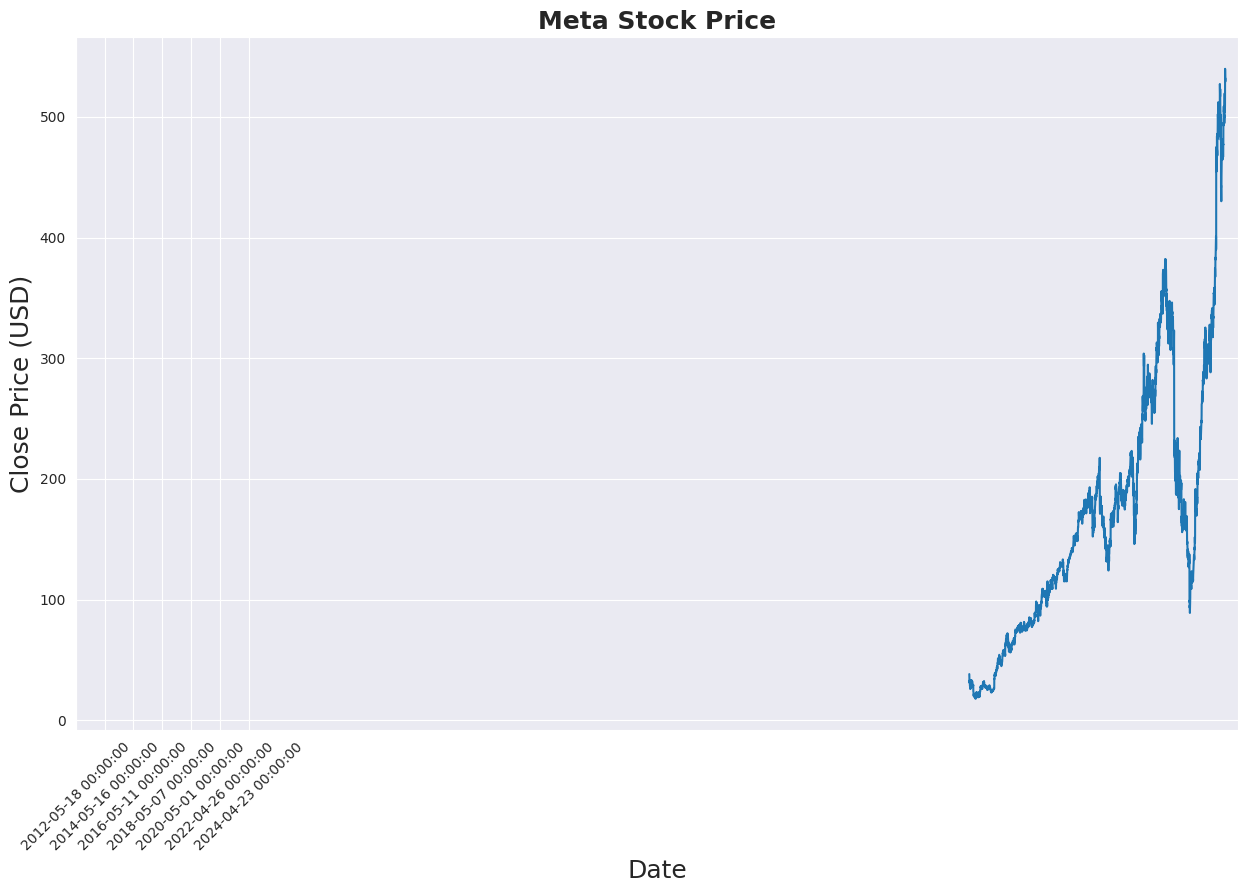

<ipython-input-50-5c5f0463365c>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/li

Lag: 1, RMSE: 129.66735908624958
Lag: 2, RMSE: 129.52155926051964
Lag: 3, RMSE: 129.58069746190884
Lag: 4, RMSE: 129.33129497971822
Lag: 5, RMSE: 129.29826202925202
Lag: 6, RMSE: 129.33083775123885
Lag: 7, RMSE: 129.34568086156324


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 8, RMSE: 129.61448100926532
Lag: 9, RMSE: 130.04796029708348
Lag: 10, RMSE: 129.69617683549333
Lag: 11, RMSE: 130.3776824720352
Lag: 12, RMSE: 129.89828608806644
Lag: 13, RMSE: 129.67405879853047
Lag: 14, RMSE: 130.2024276638405

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel


Lag: 15, RMSE: 129.60509399587596


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 16, RMSE: 130.2181405882831
Lag: 17, RMSE: 129.30234857780317
Lag: 18, RMSE: 129.6317241410263


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 19, RMSE: 127.81269886151458
Lag: 20, RMSE: 128.23997266250538
Lag: 21, RMSE: 128.4412180389856
Lag: 22, RMSE: 128.30594544324154
Lag: 23, RMSE: 128.06538912526275


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 24, RMSE: 128.5796110991736
Lag: 25, RMSE: 129.10511868856128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 26, RMSE: 129.43929646727386
Lag: 27, RMSE: 129.73835687834747


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 28, RMSE: 128.7488068901426
Lag: 29, RMSE: 129.18568570809072
Lag: 30, RMSE: 130.31996058321812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 31, RMSE: 130.82516324541947
Lag: 32, RMSE: 130.60429008309177


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 33, RMSE: 130.92117950612518
Lag: 34, RMSE: 130.77240742252928


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 35, RMSE: 132.02203349409123
Lag: 36, RMSE: 131.66103845664352


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 37, RMSE: 130.2377462167645
Lag: 38, RMSE: 130.27790761710577


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 39, RMSE: 129.4700340614831
Lag: 40, RMSE: 129.379218791174


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 41, RMSE: 129.33715664991027
Lag: 42, RMSE: 129.70210175603583


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 43, RMSE: 130.14520980346276
Lag: 44, RMSE: 129.8140347259587


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 45, RMSE: 131.03069399863034
Lag: 46, RMSE: 130.42446420059574


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 47, RMSE: 131.61218843714835
Lag: 48, RMSE: 131.5972628126706


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

Lag: 49, RMSE: 131.35060736874163
Lag: 50, RMSE: 130.9738541258102
Best Lag: 19


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



Best Lag: 19, Best RMSE: 127.81269886151458


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

# Load and inspect the dataset
filepath = '/content/META.csv'
Meta = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

# Ensure 'Date' is set as the index
if Meta.index.name != 'Date':
    Meta.set_index('Date', inplace=True)

# Plot the Close prices
sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(Meta[['Close']])
plt.xticks(range(0, Meta.shape[0], 500), Meta.index[::500], rotation=45)
plt.title("Meta Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

# Normalize the Close prices
price_Meta = Meta[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
lookback = 20  # Initial value for sequence length

train_size = int(len(price_Meta) * 0.8)
train, test = price_Meta[:train_size], price_Meta[train_size:]

# Fine-tuning the hyperparameters
def evaluate_auto_reg(lag, train, test):
    # Fit the AutoReg model
    model = AutoReg(train['Close'], lags=lag)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(predictions.values.reshape(-1, 1))
    test_actual = scaler.inverse_transform(test['Close'].values.reshape(-1, 1))

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_actual, predictions))
    return rmse, predictions

# Define the range of lags to test
lags = list(range(1, 51))  # Testing lag values from 1 to 50

# Store results for different lags
results = []

for lag in lags:
    rmse, predictions = evaluate_auto_reg(lag, train, test)
    results.append((lag, rmse))
    print(f"Lag: {lag}, RMSE: {rmse}")

# Find the best lag
best_lag = sorted(results, key=lambda x: x[1])[0][0]
print(f"Best Lag: {best_lag}")

# Fit the best Auto Regressor model
best_rmse, best_predictions = evaluate_auto_reg(best_lag, train, test)

# Plot predictions vs actual values
train_actual = scaler.inverse_transform(train['Close'].values.reshape(-1, 1))
test_actual = scaler.inverse_transform(test['Close'].values.reshape(-1, 1))

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(train)), y=train_actual.flatten(), mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=np.arange(len(train), len(train) + len(test)), y=test_actual.flatten(), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(train), len(train) + len(test)), y=best_predictions.flatten(), mode='lines', name='Prediction', line=dict(dash='dash')))

fig.update_layout(
    title='Auto Regressor Model with Fine-Tuning',
    xaxis_title='Days',
    yaxis_title='Close Price (USD)',
    template='plotly_dark'
)
fig.show()

print(f"Best Lag: {best_lag}, Best RMSE: {best_rmse}")


# CNN LSTM

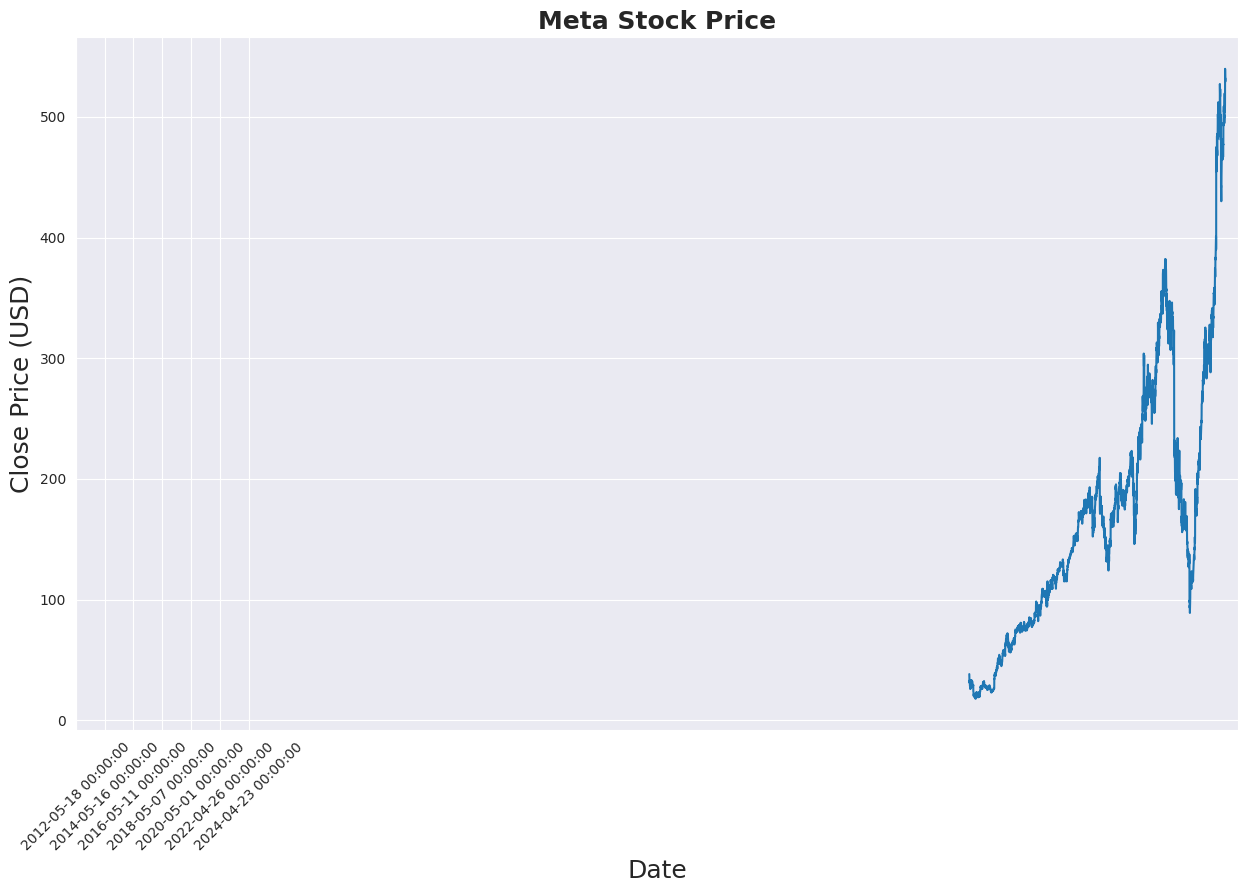

<ipython-input-51-28c2ef8fb383>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch [10/50], Loss: 0.2231
Epoch [20/50], Loss: 0.0839
Epoch [30/50], Loss: 0.0595
Epoch [40/50], Loss: 0.0288
Epoch [50/50], Loss: 0.0099
Train RMSE: 26.81
Test RMSE: 93.71


Train RMSE: 26.81
Test RMSE: 93.71


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load and inspect the dataset
filepath = '/content/META.csv'
Meta = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

# Ensure 'Date' is set as the index
if Meta.index.name != 'Date':
    Meta.set_index('Date', inplace=True)

# Plot the Close prices
sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(Meta[['Close']])
plt.xticks(range(0, Meta.shape[0], 500), Meta.index[::500], rotation=45)
plt.title("Meta Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

# Normalize the Close prices
price_Meta = Meta[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta['Close'].values.reshape(-1, 1))

# Prepare the data for CNN-LSTM
lookback = 20  # Sequence length
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

data = price_Meta.values
X, y = create_dataset(data, lookback)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the CNN-LSTM model
class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(CNN_LSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(input_size=32, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.transpose(1, 2)  # Convert to (batch, channels, seq_len)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.transpose(1, 2)  # Convert back to (batch, seq_len, features)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 50
batch_size = 64
learning_rate = 0.001

model = CNN_LSTM(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the CNN-LSTM model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    train_predictions = model(X_train)
    test_predictions = model(X_test)

# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions.numpy())
y_train = scaler.inverse_transform(y_train.numpy())
test_predictions = scaler.inverse_transform(test_predictions.numpy())
y_test = scaler.inverse_transform(y_test.numpy())

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Plot predictions vs actual values
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_train)), y=y_train.flatten(), mode='lines', name='Train Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(train_predictions)), y=train_predictions.flatten(), mode='lines', name='Train Prediction', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(y_train), len(y_train) + len(y_test)), y=y_test.flatten(), mode='lines', name='Test Actual'))
fig.add_trace(go.Scatter(x=np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), y=test_predictions.flatten(), mode='lines', name='Test Prediction', line=dict(dash='dash')))

fig.update_layout(
    title='CNN-LSTM Model with Fine-Tuning',
    xaxis_title='Days',
    yaxis_title='Close Price (USD)',
    template='plotly_dark'
)
fig.show()

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


# Time-GAN

<ipython-input-79-eb019ac5b6f4>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
38/38 [==============================] - 8s 101ms/step - loss: 0.0441 - val_loss: 0.0138
Epoch 2/50
38/38 [==============================] - 1s 38ms/step - loss: 0.0011 - val_loss: 0.0068
Epoch 3/50
38/38 [==============================] - 1s 29ms/step - loss: 7.7294e-04 - val_loss: 0.0078
Epoch 4/50
38/38 [==============================] - 1s 29ms/step - loss: 7.5336e-04 - val_loss: 0.0080
Epoch 5/50
38/38 [==============================] - 1s 29ms/step - loss: 7.4541e-04 - val_loss: 0.0078
Epoch 6/50
38/38 [==============================] - 1s 29ms/step - loss: 7.3919e-04 - val_loss: 0.0077
Epoch 7/50
38/38 [==============================] - 1s 28ms/step - loss: 7.3585e-04 - val_loss: 0.0077
Epoch 8/50
38/38 [==============================] - 1s 30ms/step - loss: 7.2601e-04 - val_loss: 0.0074
Epoch 9/50
38/38 [==============================] - 1s 29ms/step - loss: 7.2033e-04 - val_loss: 0.0070
Epoch 10/50
38/38 [==============================] - 1s 38ms/step - loss: 7.1473

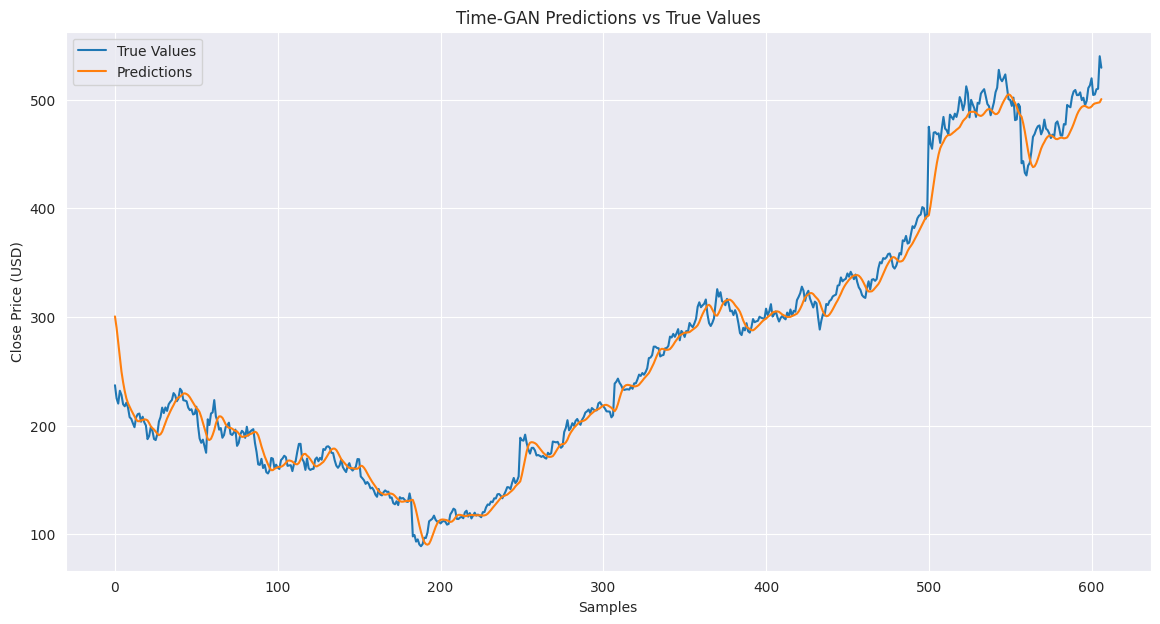

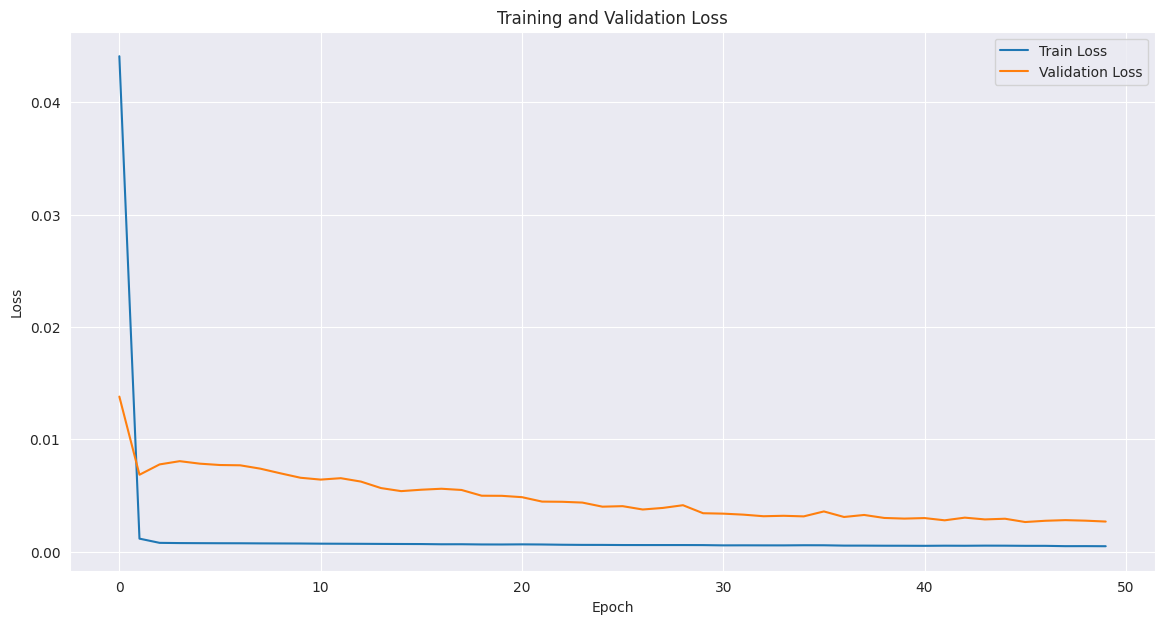

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and prepare the dataset
filepath = '/content/META.csv'
data_Meta = pd.read_csv(filepath, index_col='Date', parse_dates=['Date'])
data_Meta = data_Meta.sort_values('Date')

# Normalize the 'Close' prices
price_Meta = data_Meta[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta[['Close']])

# Split data into sequences
def split_data(stock, lookback):
    data_raw = stock.to_numpy()  # convert to numpy array
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]
    return [x_train, y_train, x_test, y_test]

lookback = 20
x_train, y_train, x_test, y_test = split_data(price_Meta, lookback)

# Define Time-GAN model
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)

# Generate predictions
y_test_pred = model.predict(x_test)

# Reshape and inverse transform the predictions and actual values
y_test_flat = y_test.reshape(-1, 1)
y_test_pred_flat = y_test_pred.reshape(-1, 1)

y_test_inv = scaler.inverse_transform(y_test_flat)
y_test_pred_inv = scaler.inverse_transform(y_test_pred_flat)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
print(f"Test RMSE: {rmse}")

# Plot predictions
plt.figure(figsize=(14,7))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_test_pred_inv, label='Predictions')
plt.title('Time-GAN Predictions vs True Values')
plt.xlabel('Samples')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Optional: Plot training and validation loss
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Time-GAN


<ipython-input-91-bc6a00ca5f73>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training with LSTM units=50, epochs=30, batch_size=32, learning_rate=0.001
19/19 [==============================] - 1s 8ms/step
Test RMSE: 13.74525792003174
Training with LSTM units=50, epochs=30, batch_size=32, learning_rate=0.01
19/19 [==============================] - 1s 8ms/step
Test RMSE: 8.973397806648832
Training with LSTM units=50, epochs=30, batch_size=64, learning_rate=0.001
19/19 [==============================] - 2s 10ms/step
Test RMSE: 16.51223004082558
Training with LSTM units=50, epochs=30, batch_size=64, learning_rate=0.01
19/19 [==============================] - 1s 11ms/step
Test RMSE: 12.930768756068982
Training with LSTM units=50, epochs=50, batch_size=32, learning_rate=0.001
19/19 [==============================] - 1s 8ms/step
Test RMSE: 11.397881010114894
Training with LSTM units=50, epochs=50, batch_size=32, learning_rate=0.01
19/19 [==============================] - 1s 11ms/step
Test RMSE: 8.841123963674598
Training with LSTM units=50, epochs=50, batch_size=64, l

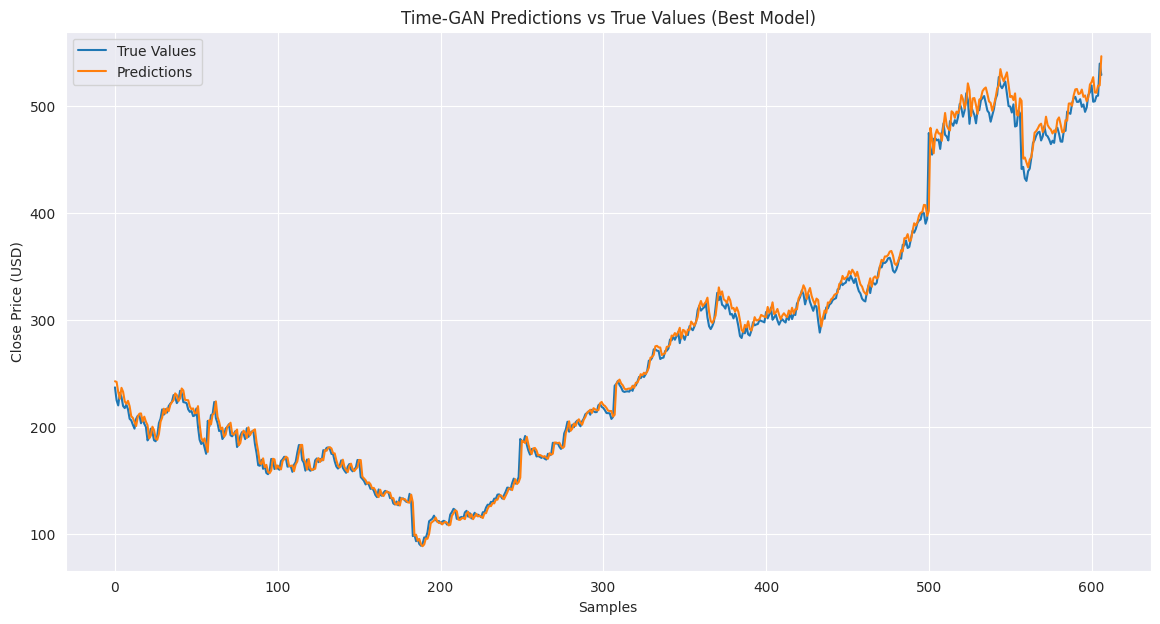

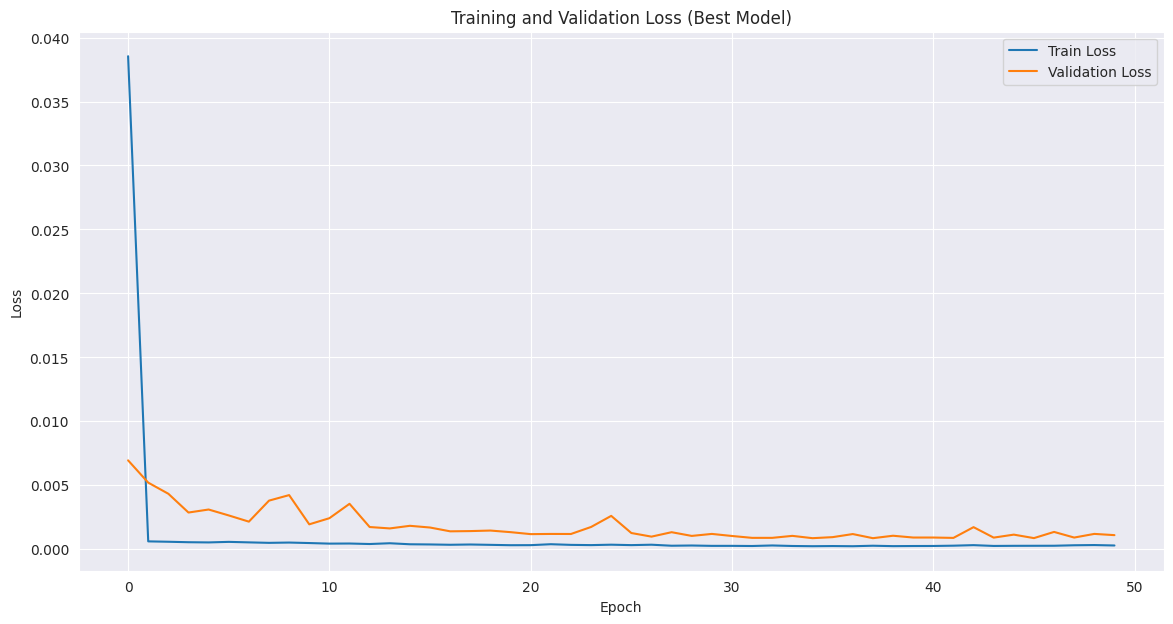

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load and prepare the dataset
filepath = '/content/META.csv'
data_Meta = pd.read_csv(filepath, index_col='Date', parse_dates=['Date'])
data_Meta = data_Meta.sort_values('Date')

# Normalize the 'Close' prices
price_Meta = data_Meta[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta[['Close']])

# Split data into sequences
def split_data(stock, lookback):
    data_raw = stock.to_numpy()  # convert to numpy array
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]
    return [x_train, y_train, x_test, y_test]

lookback = 20
x_train, y_train, x_test, y_test = split_data(price_Meta, lookback)

# Define a function to create and train the model
def create_and_train_model(lstm_units, epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
    return model, history

# Define parameter grids
lstm_units_grid = [50, 100]
epochs_grid = [30, 50]
batch_size_grid = [32, 64]
learning_rate_grid = [0.001, 0.01]

# Perform Grid Search
best_rmse = float('inf')
best_params = None
best_model = None

for lstm_units in lstm_units_grid:
    for epochs in epochs_grid:
        for batch_size in batch_size_grid:
            for learning_rate in learning_rate_grid:
                print(f"Training with LSTM units={lstm_units}, epochs={epochs}, batch_size={batch_size}, learning_rate={learning_rate}")

                model, history = create_and_train_model(lstm_units, epochs, batch_size, learning_rate)

                # Generate predictions
                y_test_pred = model.predict(x_test)

                # Reshape and inverse transform the predictions and actual values
                y_test_flat = y_test.reshape(-1, 1)
                y_test_pred_flat = y_test_pred.reshape(-1, 1)

                y_test_inv = scaler.inverse_transform(y_test_flat)
                y_test_pred_inv = scaler.inverse_transform(y_test_pred_flat)

                # Compute RMSE
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
                print(f"Test RMSE: {rmse}")

                # Update best model if necessary
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        'lstm_units': lstm_units,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'learning_rate': learning_rate
                    }
                    best_model = model
                    best_history = history  # Save the history of the best model

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

# Plot the best model's predictions
y_test_pred = best_model.predict(x_test)
y_test_flat = y_test.reshape(-1, 1)
y_test_pred_flat = y_test_pred.reshape(-1, 1)

y_test_inv = scaler.inverse_transform(y_test_flat)
y_test_pred_inv = scaler.inverse_transform(y_test_pred_flat)

plt.figure(figsize=(14,7))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_test_pred_inv, label='Predictions')
plt.title('Time-GAN Predictions vs True Values (Best Model)')
plt.xlabel('Samples')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Plot training and validation loss for the best model
plt.figure(figsize=(14,7))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Attention

<ipython-input-85-b5d64a88b63a>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training with LSTM units=50, epochs=30, batch_size=32, learning_rate=0.001
19/19 [==============================] - 2s 10ms/step
Test RMSE: 23.695389127037416
Training with LSTM units=50, epochs=30, batch_size=32, learning_rate=0.01
19/19 [==============================] - 1s 6ms/step
Test RMSE: 8.235943626894919
Training with LSTM units=50, epochs=30, batch_size=64, learning_rate=0.001
19/19 [==============================] - 1s 8ms/step
Test RMSE: 35.703451201904386
Training with LSTM units=50, epochs=30, batch_size=64, learning_rate=0.01
19/19 [==============================] - 1s 6ms/step
Test RMSE: 13.41723098985983
Training with LSTM units=50, epochs=50, batch_size=32, learning_rate=0.001
19/19 [==============================] - 1s 6ms/step
Test RMSE: 14.3389232125262
Training with LSTM units=50, epochs=50, batch_size=32, learning_rate=0.01
19/19 [==============================] - 1s 5ms/step
Test RMSE: 8.079438944546865
Training with LSTM units=50, epochs=50, batch_size=64, lear

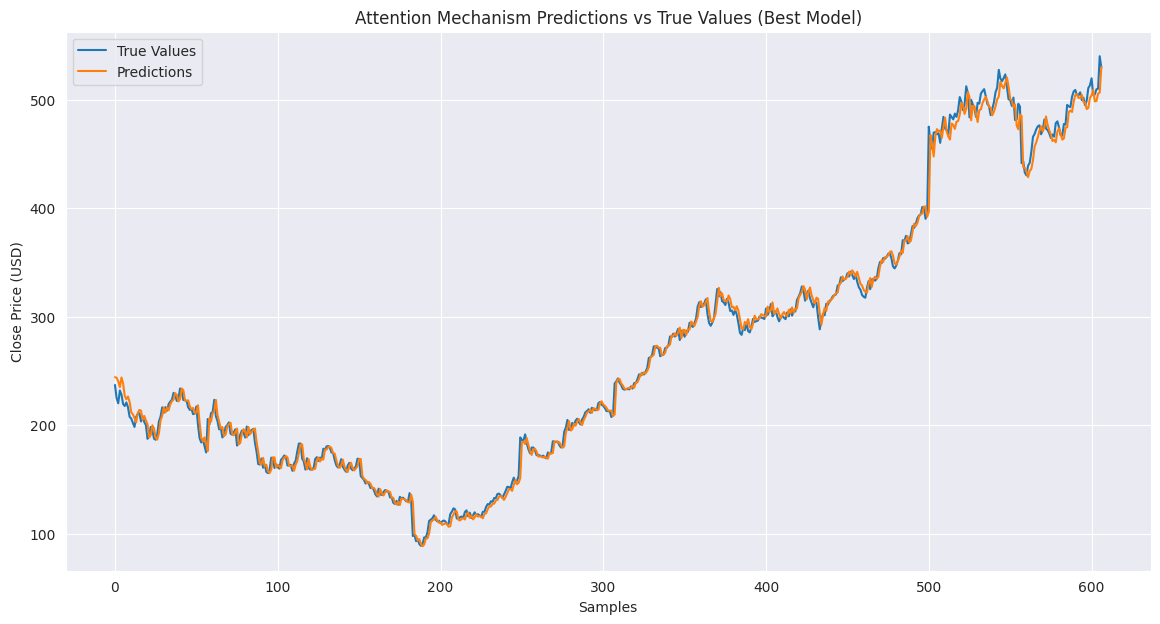

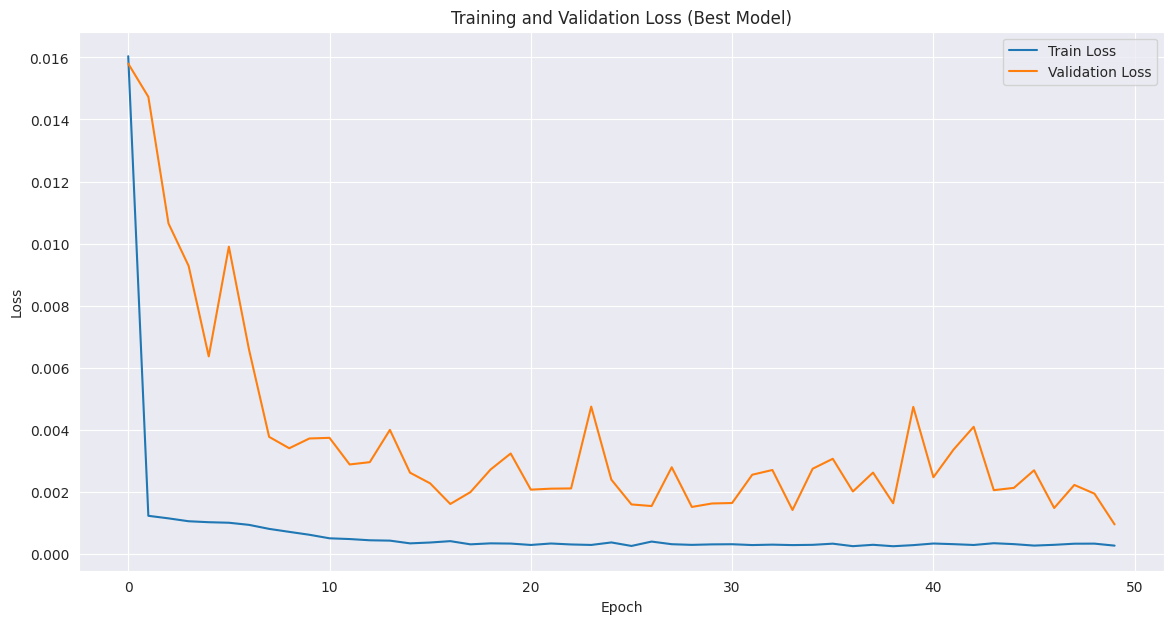

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Permute, Lambda, Multiply
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Load and prepare the dataset
filepath = '/content/META.csv'
data_Meta = pd.read_csv(filepath, index_col='Date', parse_dates=['Date'])
data_Meta = data_Meta.sort_values('Date')

# Normalize the 'Close' prices
price_Meta = data_Meta[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price_Meta['Close'] = scaler.fit_transform(price_Meta[['Close']])

# Split data into sequences
def split_data(stock, lookback):
    data_raw = stock.to_numpy()  # convert to numpy array
    data = []
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]
    return [x_train, y_train, x_test, y_test]

lookback = 20
x_train, y_train, x_test, y_test = split_data(price_Meta, lookback)

# Define the attention mechanism
def attention_3d_block(inputs):
    a = Permute((2, 1))(inputs)  # Shape (batch_size, features, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # Apply attention weights
    a = Permute((2, 1))(a)  # Shape (batch_size, timesteps, features)
    output_attention_mul = Multiply()([inputs, a])
    return K.sum(output_attention_mul, axis=1)

# Define the model with attention
def create_and_train_attention_model(lstm_units, epochs, batch_size, learning_rate):
    inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    attention_out = attention_3d_block(lstm_out)
    lstm_out = LSTM(lstm_units, return_sequences=False)(K.expand_dims(attention_out, axis=1))
    outputs = Dense(1)(lstm_out)

    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
    return model, history

# Define parameter grids
lstm_units_grid = [50, 100]
epochs_grid = [30, 50]
batch_size_grid = [32, 64]
learning_rate_grid = [0.001, 0.01]

# Perform Grid Search
best_rmse = float('inf')
best_params = None
best_model = None

for lstm_units in lstm_units_grid:
    for epochs in epochs_grid:
        for batch_size in batch_size_grid:
            for learning_rate in learning_rate_grid:
                print(f"Training with LSTM units={lstm_units}, epochs={epochs}, batch_size={batch_size}, learning_rate={learning_rate}")

                model, history = create_and_train_attention_model(lstm_units, epochs, batch_size, learning_rate)

                # Generate predictions
                y_test_pred = model.predict(x_test)

                # Reshape and inverse transform the predictions and actual values
                y_test_flat = y_test.reshape(-1, 1)
                y_test_pred_flat = y_test_pred.reshape(-1, 1)

                y_test_inv = scaler.inverse_transform(y_test_flat)
                y_test_pred_inv = scaler.inverse_transform(y_test_pred_flat)

                # Compute RMSE
                rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
                print(f"Test RMSE: {rmse}")

                # Update best model if necessary
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        'lstm_units': lstm_units,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'learning_rate': learning_rate
                    }
                    best_model = model
                    best_history = history  # Save the history of the best model

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

# Plot the best model's predictions
y_test_pred = best_model.predict(x_test)
y_test_flat = y_test.reshape(-1, 1)
y_test_pred_flat = y_test_pred.reshape(-1, 1)

y_test_inv = scaler.inverse_transform(y_test_flat)
y_test_pred_inv = scaler.inverse_transform(y_test_pred_flat)

plt.figure(figsize=(14,7))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_test_pred_inv, label='Predictions')
plt.title('Attention Mechanism Predictions vs True Values (Best Model)')
plt.xlabel('Samples')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Plot training and validation loss for the best model
plt.figure(figsize=(14,7))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
